<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IRIS.csv")

In [ ]:
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Columns:", df.columns)

Dataset Shape: (150, 5)
First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
cols_with_nulls = [col for col in df.columns if df[col].isnull().sum() > 0]
print(cols_with_nulls)


[]


In [ ]:
print("Feature Shape:", X.shape)
print("Class Distribution:\n", y.value_counts())

Feature Shape: (150, 4)
Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


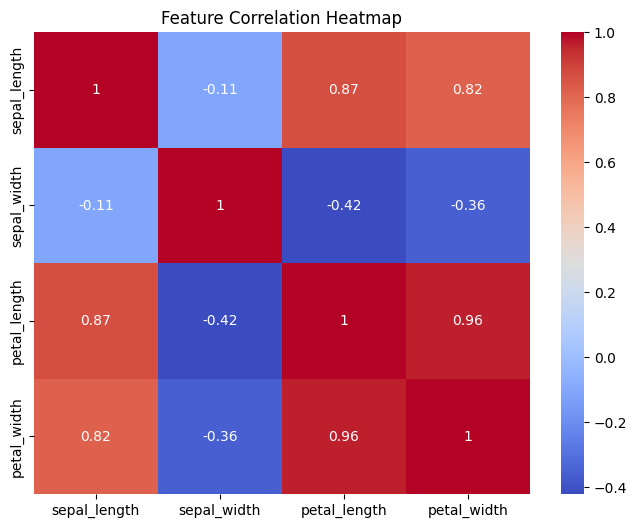

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

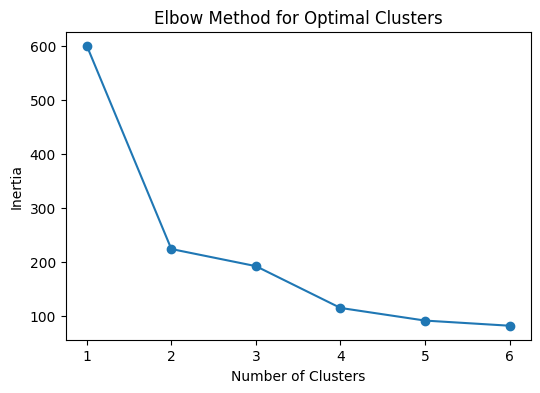

In [ ]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,7), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
best_clusters = 3
kmeans = KMeans(n_clusters=best_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

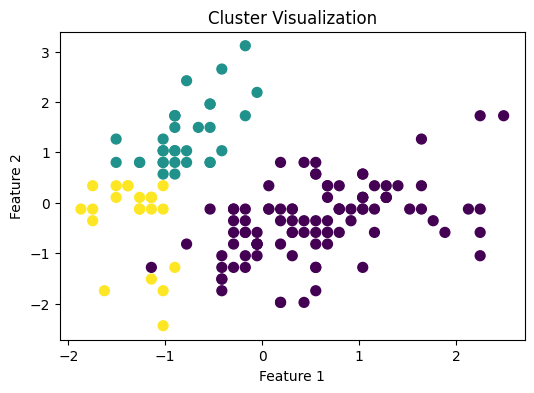

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Cluster Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
X_scaled_with_cluster = np.hstack((X_scaled, cluster_labels.reshape(-1,1)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_cluster, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)


In [ ]:
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ab = AdaBoostClassifier(random_state=42)
grid_search_ab = GridSearchCV(ab, param_grid_ab, cv=5, scoring='accuracy')
grid_search_ab.fit(X_train, y_train)

best_ab = grid_search_ab.best_estimator_
y_pred_ab = best_ab.predict(X_test)

--- Random Forest with Cluster ---
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



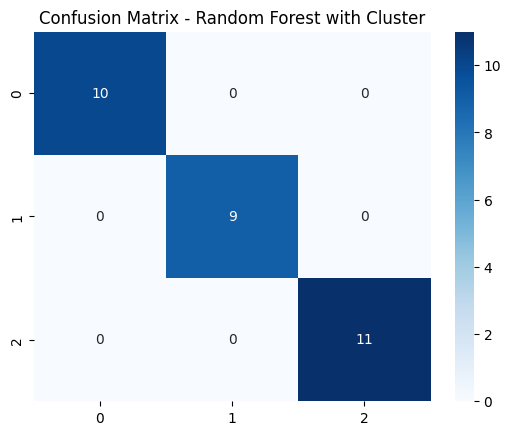

--- AdaBoost with Cluster ---
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



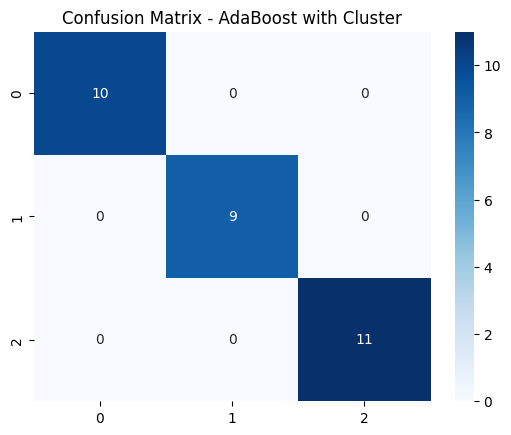

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest with Cluster")
evaluate_model(y_test, y_pred_ab, "AdaBoost with Cluster")

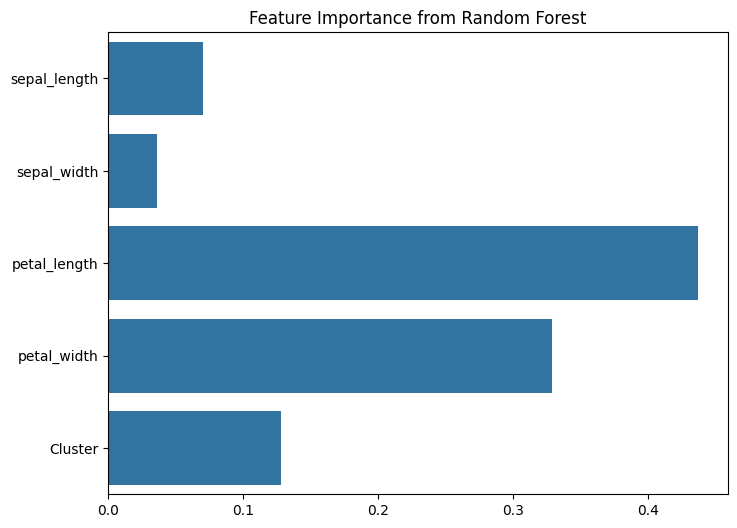

In [ ]:
feature_names = list(X.columns) + ["Cluster"]
importances = best_rf.feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()

In [ ]:
cv_scores = cross_val_score(best_rf, X_scaled_with_cluster, y, cv=5)
print("5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

5-Fold CV Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9666666666666668
